In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
import lightkurve as lk
from scipy import *
from astropy import constants as ac
from astropy import units as u

In [3]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True
plt.rcParams['axes.linewidth']=1.5

In [4]:
candidates = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/candidates_heating_rates.csv')
confirmed = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/confirmed_heating_rates.csv')
#'/Users/lupitatovar/Cool-Worlds/targets/confirmed_heating_rates.csv' has the calculated heating rates already!
#('/Users/lupitatovar/Cool-Worlds/targets/candidates_heating_rates.csv') has calcualted heating_rates for candidates

Load up various mass radius planet models from here: https://lweb.cfa.harvard.edu/~lzeng/planetmodels.html#mrrelation

In [81]:
Pure_iron = pd.read_csv('/Users/lupitatovar/Cool-Worlds/models/pure_iron.csv',delim_whitespace=True)
rocky_earth = pd.read_csv('/Users/lupitatovar/Cool-Worlds/models/earth_like_rocky.csv',delim_whitespace=True)
pure_rock= pd.read_csv('/Users/lupitatovar/Cool-Worlds/models/pure_rock.csv',delim_whitespace=True)
h2o_300k = pd.read_csv('/Users/lupitatovar/Cool-Worlds/models/h20_300k.csv',delim_whitespace=True)

In [87]:
h20_mix_300k = pd.read_csv('/Users/lupitatovar/Cool-Worlds/models/h20_mix_300k.csv',delim_whitespace=True)

## Sample by Discovery 

Planetary Models

(0.5, 50.0)

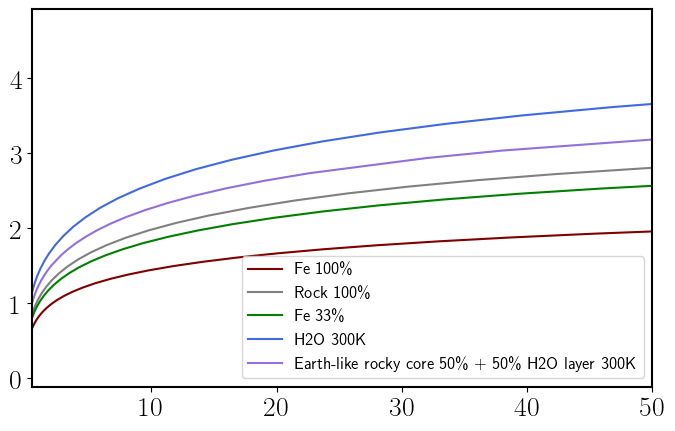

In [90]:
#planet models

plt.plot(Pure_iron['Mass'],Pure_iron['Radius'],color='maroon',label='Fe 100\%')
plt.plot(pure_rock['Mass'],pure_rock['Radius'],color='grey',label ='Rock 100\%') #100% MgSiO3
plt.plot(rocky_earth['Mass'],rocky_earth['Radius'],color='green',label ='Fe 33\%') #earth-like rocky  (32.5% Fe+67.5% MgSiO3)
plt.plot(h2o_300k['Mass'],h2o_300k['Radius'],color ='royalblue', label ='H2O 300K')
plt.plot(h20_mix_300k['Mass'],h20_mix_300k['Radius'],color ='mediumpurple', label ='Earth-like rocky core 50\% + 50\% H2O layer 300K')

plt.legend(fontsize = 12)
plt.xlim(0.5,50)
#plt.xscale('linear')

### Mass v Radius

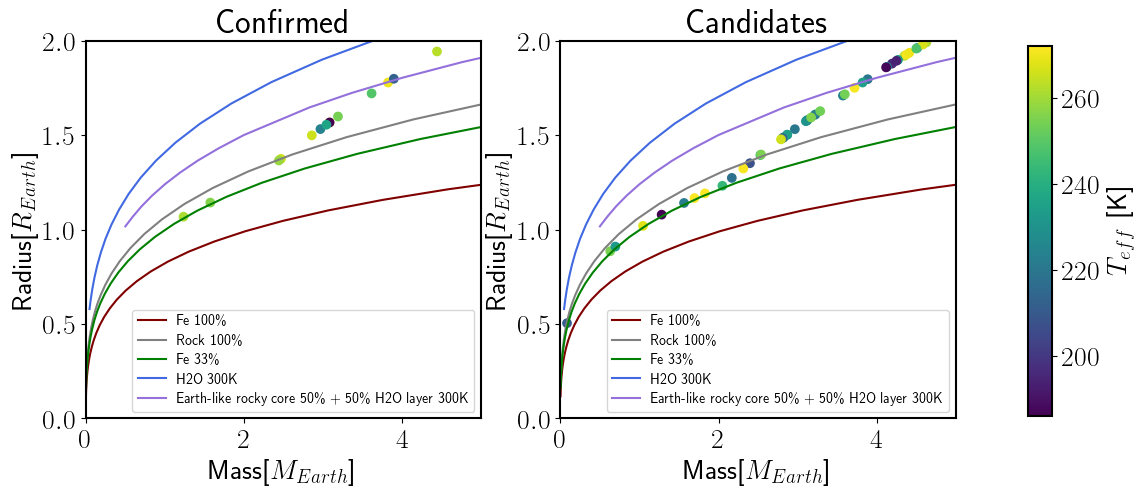

In [94]:
fig, axs = plt.subplots(1,2, figsize=(12,5), facecolor='w', edgecolor='k')

#planet models
axs[0].plot(Pure_iron['Mass'],Pure_iron['Radius'],color='maroon',label='Fe 100\%')
axs[0].plot(pure_rock['Mass'],pure_rock['Radius'],color='grey',label ='Rock 100\%') #100% MgSiO3
axs[0].plot(rocky_earth['Mass'],rocky_earth['Radius'],color='green',label ='Fe 33\%') #earth-like rocky  (32.5% Fe+67.5% MgSiO3)
axs[0].plot(h2o_300k['Mass'],h2o_300k['Radius'],color ='royalblue', label ='H2O 300K')
axs[0].plot(h20_mix_300k['Mass'],h20_mix_300k['Radius'],color ='mediumpurple', label ='Earth-like rocky core 50\% + 50\% H2O layer 300K')


#data
axs[0].scatter(confirmed['masse_est'],confirmed['rade'],marker='o',c=confirmed['T_eff'].values)

#setting plot labels
axs[0].set_xlim(0,5)
axs[0].set_ylim(0,2)
axs[0].set_ylabel('Radius[$R_{Earth}$]')
axs[0].set_xlabel('Mass[$M_{Earth}$]')
axs[0].set_title("Confirmed")
axs[0].legend(fontsize=10)

#data part 2
axs[1].scatter(candidates['masse_est'],candidates['Radius'],c=candidates['T_eff'].values)

#planet models
axs[1].plot(Pure_iron['Mass'],Pure_iron['Radius'],color='maroon',label='Fe 100\%')
axs[1].plot(pure_rock['Mass'],pure_rock['Radius'],color='grey',label ='Rock 100\%') #100% MgSiO3
axs[1].plot(rocky_earth['Mass'],rocky_earth['Radius'],color='green',label ='Fe 33\%') #earth-like rocky  (32.5% Fe+67.5% MgSiO3)
axs[1].plot(h2o_300k['Mass'],h2o_300k['Radius'],color ='royalblue', label ='H2O 300K')
axs[1].plot(h20_mix_300k['Mass'],h20_mix_300k['Radius'],color ='mediumpurple', label ='Earth-like rocky core 50\% + 50\% H2O layer 300K')


#plot labels
axs[1].set_xlim(0,5)
axs[1].set_ylim(0,2)
axs[1].set_xlabel('Mass[$M_{Earth}$]')
axs[1].set_ylabel('Radius[$R_{Earth}$]')
axs[1].set_title("Candidates")
axs[1].legend(fontsize=10)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.91, 0.13, 0.02, 0.74])
s = plt.scatter(confirmed['masse_est'],confirmed['rade'],marker='o',c=confirmed['T_eff'].values)
fig.colorbar(s, cax=cbar_ax,label='$T_{eff}$ [K]')

Text(0.5, 1.0, 'Confirmed Planets')

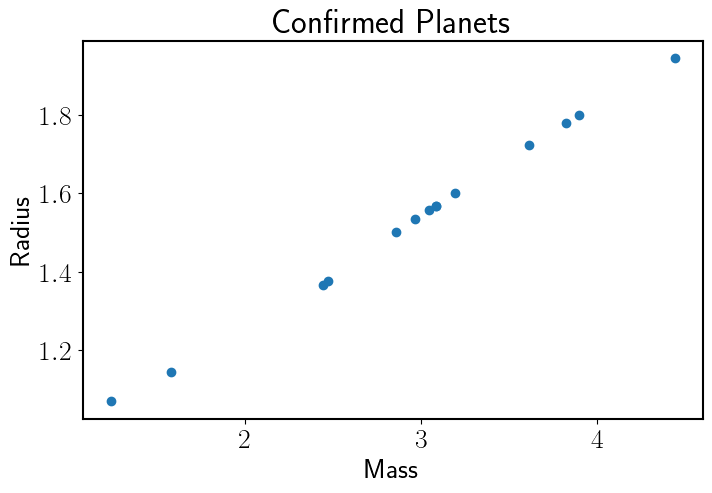

In [39]:
plt.scatter(confirmed['masse_est'],confirmed['rade'])


plt.xlabel('Mass')
plt.ylabel('Radius')
plt.title('Confirmed Planets')

Text(0.5, 1.0, 'Candidate Planets')

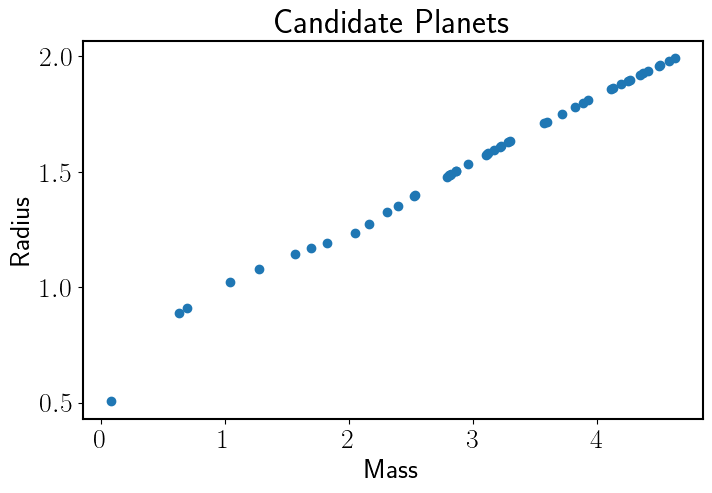

In [9]:
plt.scatter(candidates['masse_est'],candidates['Radius'])
plt.xlabel('Mass')
plt.ylabel('Radius')
plt.title('Candidate Planets')

### Insolation v Radius

Text(0.5, 1.0, 'Confirmed Planets')

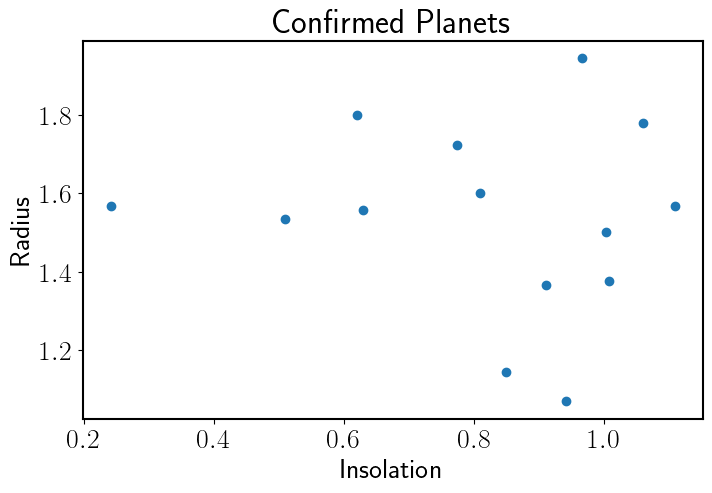

In [13]:
plt.scatter(confirmed['insol'],confirmed['rade'])
plt.xlabel('Insolation')
plt.ylabel('Radius')
plt.title('Confirmed Planets')

Text(0.5, 1.0, 'Candidate Planets')

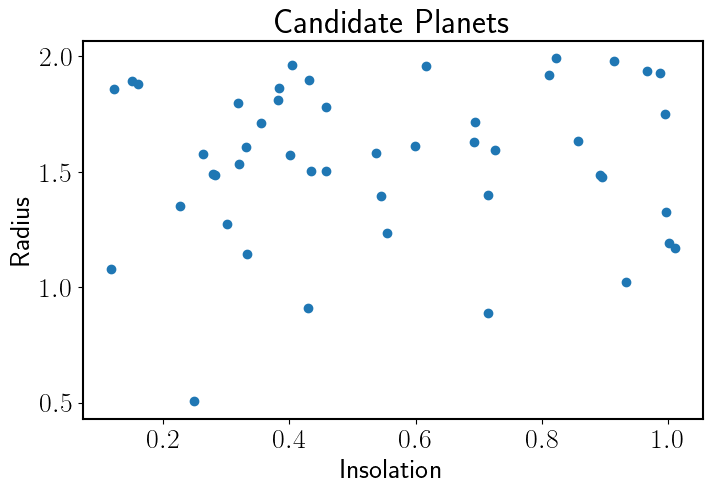

In [10]:
plt.scatter(candidates['Insolation'],candidates['Radius'])
plt.xlabel('Insolation')
plt.ylabel('Radius')
plt.title('Candidate Planets')

### Insolation v Mass

Text(0.5, 1.0, 'Confirmed Planets')

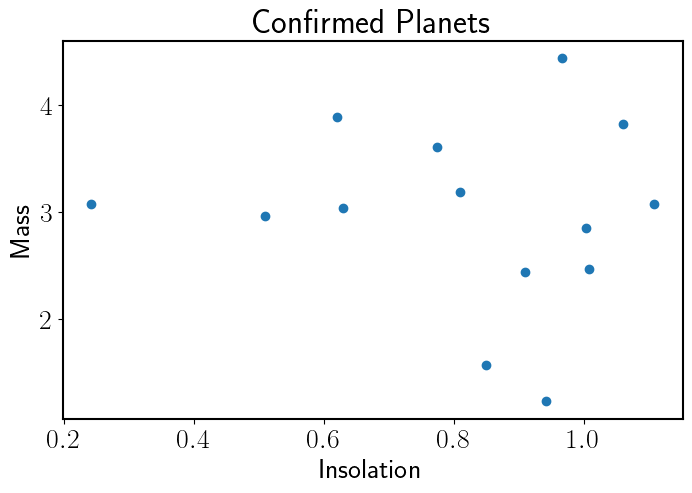

In [14]:
plt.scatter(confirmed['insol'],confirmed['masse_est'])
plt.xlabel('Insolation')
plt.ylabel('Mass')
plt.title('Confirmed Planets')

Text(0.5, 1.0, 'Candidate Planets')

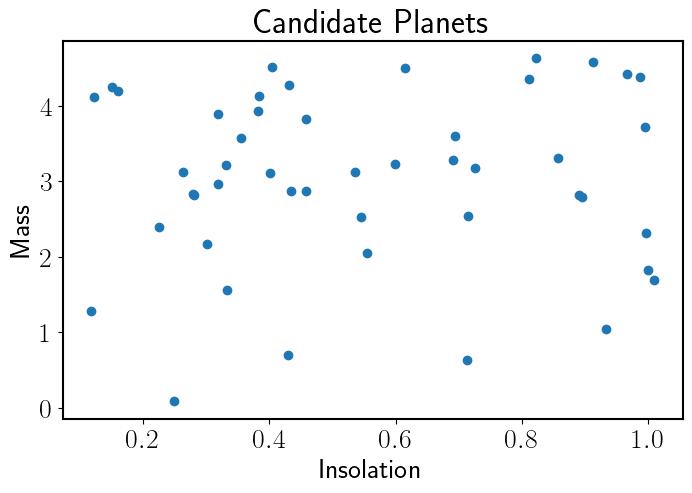

In [11]:
plt.scatter(candidates['Insolation'],candidates['masse_est'])
plt.xlabel('Insolation')
plt.ylabel('Mass')
plt.title('Candidate Planets')